In [1]:
#Author - Ravikiran S Basutkar
#Innomatics Internship April 2021
#Innominions
#Task - 11 (EDA + Missing Value + Outlier + ML Model)  \
#adult.csv  dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('adult.csv')

In [4]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.shape

(48842, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### EDA 

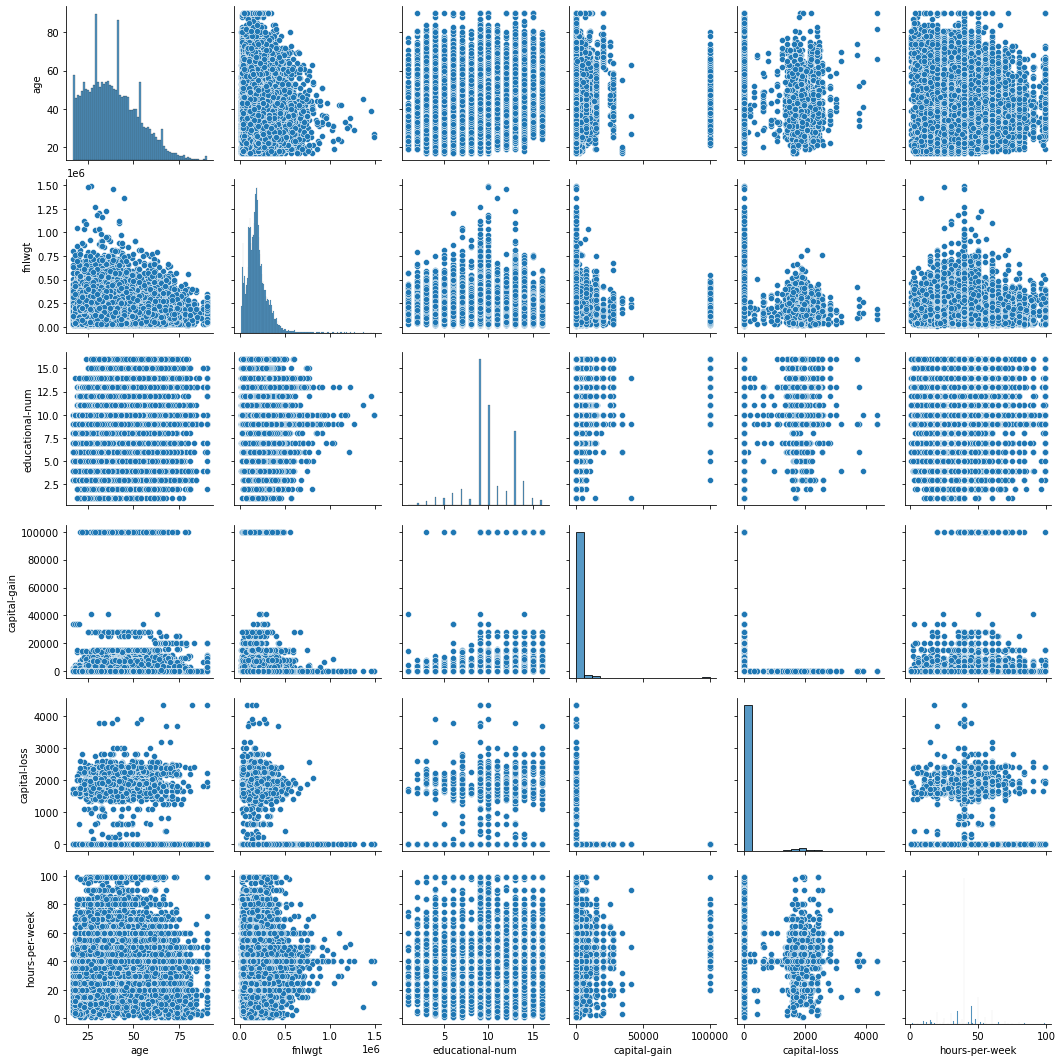

In [10]:
sns.pairplot(df)

In [11]:
#df.isalnum().sum()
import re

In [12]:
df[df['workclass']=='?'].shape[0]

2799

In [13]:
df[df['occupation']=='?'].shape[0]

2809

In [14]:
df[df['occupation']==df['workclass']].count()

age                2799
workclass          2799
fnlwgt             2799
education          2799
educational-num    2799
marital-status     2799
occupation         2799
relationship       2799
race               2799
gender             2799
capital-gain       2799
capital-loss       2799
hours-per-week     2799
native-country     2799
income             2799
dtype: int64

In [15]:
#m=df[df == '?']
#df.where(m, -df)

### Bivariate Analysis

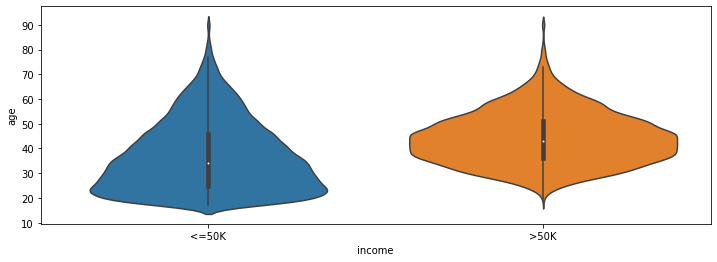

In [16]:
# violin plot
plt.figure(figsize=(12,4))
sns.violinplot(x="income",y="age",data=df)
plt.show()

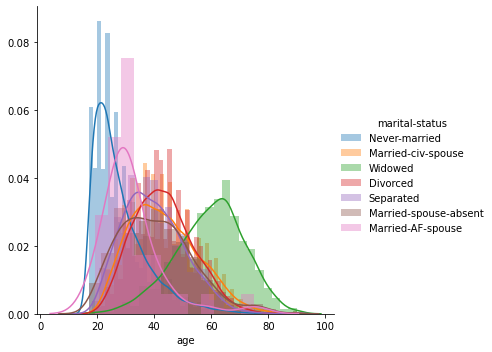

In [17]:
sns.FacetGrid(df, hue="marital-status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend()

In [18]:
#from above we can see that never-married (blue color legend)- lie betweeen 19-27 age on x-axis) which is logical 
#print('any'.encode())


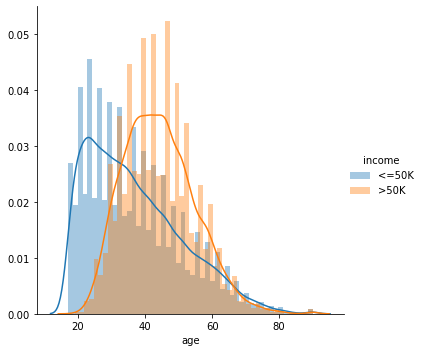

In [19]:
sns.FacetGrid(df, hue="income", size=5) \
   .map(sns.distplot, "age") \
   .add_legend()

In [20]:
#from above we can see that maximum people having salary >50k are having age greater than those having <=50k, this logically true 
#as experience increase (so as age increases) income increases.

In [21]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [22]:
df[df['workclass']=='?'].shape[0]

2799

In [23]:
df[df['occupation']=='?'].shape[0]

2809

In [24]:
df[df['native-country']=='?'].shape[0]

857

In [25]:
df[df['income']=='?'].shape[0]

0

## we see that missing values are present with values '?'  in 3 columns - 'workclass', 'occupation' and 'native-country'


### Find and treat the outliers and missing values

In [27]:
missing_val = ['n/a', '-', '?']

In [29]:
df = pd.read_csv('adult.csv', na_values = missing_val)

df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [30]:
df.isnull()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
# Identifying missing values in columns
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [32]:
# Columns with atleast one missing value
df.isnull().any(axis=0)

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
dtype: bool

In [34]:
#Columns with all missing values
df.isnull().all(axis=0)

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [35]:
# Number of columns with all missing values
df.isnull().all(axis=0).sum()

0

In [36]:
# Rows with atleast one missing values
df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4         True
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

In [37]:
#Rows with all missing values
df.isnull().all(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

In [38]:
# Number of rows with all missing values
df.isnull().all(axis=1).sum()

0


## Missing values Treatment in Columns

In [40]:
round(100*(df.isnull().sum()/len(df.index)), 2)

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

In [47]:
df[df.isnull().sum(axis=1) >=3]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2160,28,NaN,243190,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Male,0,0,30,NaN,<=50K
2323,50,NaN,339547,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,50,NaN,<=50K
2584,47,NaN,163748,Masters,14,Divorced,NaN,Unmarried,White,Female,0,0,35,NaN,<=50K
2612,27,NaN,258231,HS-grad,9,Never-married,NaN,Not-in-family,White,Male,0,0,35,NaN,<=50K
2774,27,NaN,132372,HS-grad,9,Never-married,NaN,Unmarried,White,Female,0,0,40,NaN,<=50K
3074,23,NaN,264874,Assoc-voc,11,Never-married,NaN,Other-relative,White,Female,0,0,40,NaN,<=50K
3671,24,NaN,35633,Some-college,10,Never-married,NaN,Not-in-family,White,Male,0,0,11,NaN,<=50K
3853,28,NaN,195568,Some-college,10,Married-civ-spouse,NaN,Wife,White,Female,0,0,15,NaN,>50K
5052,21,NaN,156780,Some-college,10,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,15,NaN,<=50K
5972,40,NaN,95049,Assoc-voc,11,Separated,NaN,Own-child,White,Female,0,0,40,NaN,<=50K


In [48]:
# retaining the rows having <= 4 NaNs
df = df[df.isnull().sum(axis=1) <= 4]

# look at the summary again
round(100*(df.isnull().sum()/len(df.index)), 2)

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

In [49]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [50]:
df['workclass'].describe()

count       46043
unique          8
top       Private
freq        33906
Name: workclass, dtype: object

## one way is to remove all the rows containing missing value ('?' or nan)
## other way is mean, median or mode imputation- replacing the missing value with mean, median or mode

In [55]:
#1st way is done by dropna
#df2 = df.dropna()

In [56]:

# imputing preTestScore by mode values
#df['workclass'].fillna(df['workclass'].mode(), inplace=True)

#round(100*(df.isnull().sum()/len(df.index)), 2)
df2=df.copy()
mode_workclass = df.workclass.mode()
mode_workclass
df2.workclass = df.workclass.fillna((mode_workclass)[0])
df2.workclass.isna().sum()

0

In [58]:
#after mode imputation on workclass column
# Identifying missing values in columns
df2.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [59]:
#we can see that now workclass columns has no missing value
#similarly for other 2 columns 'occcupation and 'native-country' we perform mode imputation
mode_occupation = df2.occupation.mode()
mode_occupation
df2.occupation = df.occupation.fillna((mode_occupation)[0])
df2.occupation.isna().sum()

0

In [61]:
df2.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation           0
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [62]:
#we will retain native-country column since we need to rename it to perform imputation of missing value

### Outlier detection and treatment

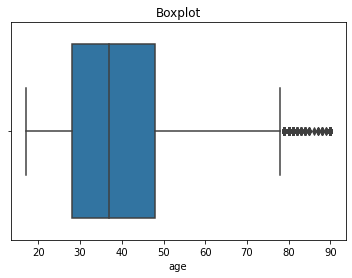

In [63]:
sns.boxplot(df.age);plt.title('Boxplot');plt.show() 

Text(0.5, 1.0, 'capital-gain')

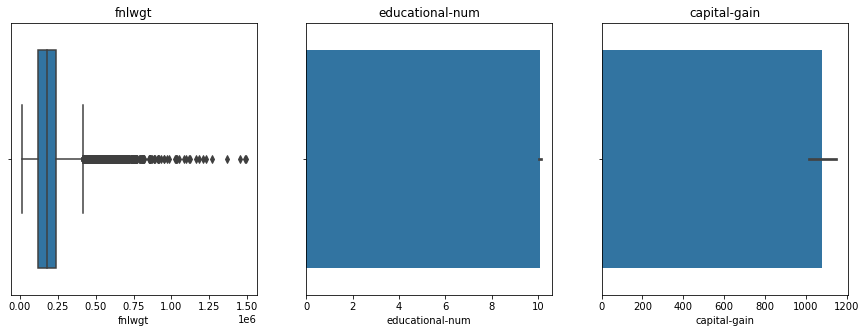

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
#fig.suptitle('adult.csv')

# fnlwgt 
sns.boxplot(ax=axes[0], x=df['fnlwgt'])
axes[0].set_title('fnlwgt')

# educational-num
sns.barplot(ax=axes[1], x=df['educational-num'])
axes[1].set_title('educational-num')

# capital-gain
sns.barplot(ax=axes[2], x=df['capital-gain'])
axes[2].set_title('capital-gain')

Text(0.5, 1.0, 'hours-per-week')

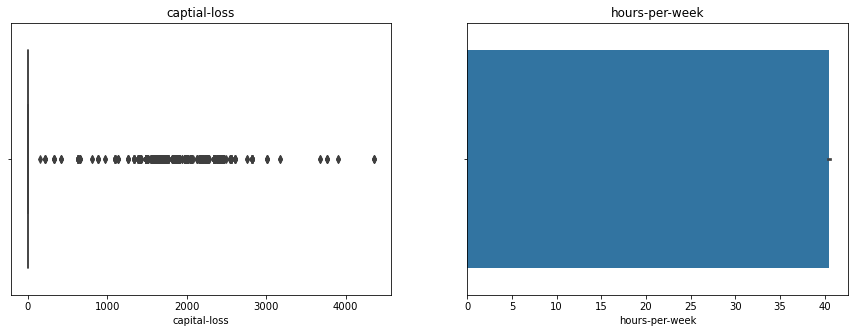

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#fig.suptitle('adult.csv')

# capital-loss
sns.boxplot(ax=axes[0], x=df['capital-loss'])
axes[0].set_title('captial-loss')

#hours-per-week 
sns.barplot(ax=axes[1], x=df['hours-per-week'])
axes[1].set_title('hours-per-week')



In [71]:
#outlier treatment
#IQR method
#we can use winsorization technique (Percentile Capping) to treat outlier, it basically Replaces the outlier value by cap values i.e 25% and 95% quartiles values
#other way is trimming i.e Remove the rows containing outlier
#We can also do manual replacing of those values which are greater or smaller than upper limit or lower limit by that values


In [73]:
# outlier treatment for age column
#from feature_engine.outlier_removers import Winsorizer
from feature_engine.outliers import Winsorizer
windsoriser = Winsorizer(capping_method='iqr', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['age','capital-loss'])

df_outl_trea = windsoriser.fit_transform(df[['age','capital-loss']])

# we can inspect the minimum caps and maximum caps 
windsoriser.left_tail_caps_, windsoriser.right_tail_caps_

({'age': -2.0, 'capital-loss': 0.0}, {'age': 78.0, 'capital-loss': 0.0})

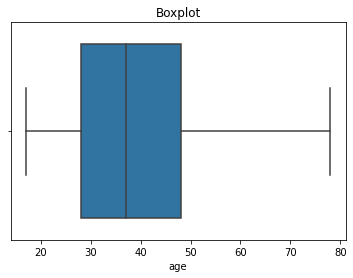

In [74]:

sns.boxplot(df_outl_trea.age);plt.title('Boxplot');plt.show() 

In [75]:
#from above we can see that after windsorizer treatment, there are no outliers present

## Conclusion of EDA- we can observe that given data contains outliers and missing values which are treated so that the model while predicting class of Income (Classification model) doesnt get affected
## Further we can perform feature engineering to make the accuracy of the model more, so that model becomes better

## Perform feature transformation:-


In [77]:
#For Numerical Features -> Do Column Standardization
#this is done so that one column does not influence the output over another column based on the numerical magnitude values
# all the numeric columns are converted in range with min=0 and max=1

In [78]:
numeric_features=['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_tr=df.loc[:,numeric_features]
X_tr = sc.fit_transform(X_tr)
X_tr=pd.DataFrame(X_tr)
X_tr.columns=numeric_features
X_tr.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04
mean,1.584958e-16,-4.742349e-17,1.594573e-17,2.294458e-16,7.617582e-17,9.071110e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.578629e+00,-1.679680e+00,-3.531030e+00,-1.448035e-01,-2.171271e-01,-3.181452e+00
25%,-7.763164e-01,-6.828752e-01,-4.193353e-01,-1.448035e-01,-2.171271e-01,-3.408696e-02
50%,-1.198790e-01,-1.090844e-01,-3.037346e-02,-1.448035e-01,-2.171271e-01,-3.408696e-02
75%,6.824334e-01,4.543232e-01,7.475502e-01,-1.448035e-01,-2.171271e-01,3.694214e-01
max,3.745808e+00,1.231723e+01,2.303397e+00,1.327438e+01,1.059179e+01,4.727312e+00


In [79]:
#or Categorical -> if more than 2 categories, use dummy variables. Otherwise convert the feature to Binary.
# we can use get_dummies or label encoder, or onehot encoding
cat_features=  ['workclass','education', 'occupation', 'relationship', 'race', 'gender' , 'native-country']
cat_df=df2.loc[:,cat_features]
cat_df2= pd.DataFrame(pd.get_dummies(cat_df))
print(cat_df2.describe())
print('--###--'*60)
print(cat_df2.info())

       workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
count           48842.000000         48842.000000            48842.000000   
mean                0.029319             0.064207                0.000205   
std                 0.168701             0.245124                0.014307   
min                 0.000000             0.000000                0.000000   
25%                 0.000000             0.000000                0.000000   
50%                 0.000000             0.000000                0.000000   
75%                 0.000000             0.000000                0.000000   
max                 1.000000             1.000000                1.000000   

       workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
count       48842.000000            48842.000000                48842.000000   
mean            0.751505                0.034704                    0.079071   
std             0.432145                0.183030                  

In [88]:
output_y=df.income


In [91]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
output_y2 = labelencoder.fit_transform(output_y)
output_y3= pd.DataFrame(output_y)
output_y3.head()

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K


In [84]:
X_tr.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04
mean,1.584958e-16,-4.742349e-17,1.594573e-17,2.294458e-16,7.617582e-17,9.071110e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.578629e+00,-1.679680e+00,-3.531030e+00,-1.448035e-01,-2.171271e-01,-3.181452e+00
25%,-7.763164e-01,-6.828752e-01,-4.193353e-01,-1.448035e-01,-2.171271e-01,-3.408696e-02
50%,-1.198790e-01,-1.090844e-01,-3.037346e-02,-1.448035e-01,-2.171271e-01,-3.408696e-02
75%,6.824334e-01,4.543232e-01,7.475502e-01,-1.448035e-01,-2.171271e-01,3.694214e-01
max,3.745808e+00,1.231723e+01,2.303397e+00,1.327438e+01,1.059179e+01,4.727312e+00


In [85]:
cat_df2.describe()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,...,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.029319,0.064207,0.000205,0.751505,0.034704,0.079071,0.040559,0.000430,0.028439,0.037099,...,0.001372,0.003767,0.000430,0.002355,0.001331,0.000614,0.000553,0.897424,0.001761,0.000471
std,0.168701,0.245124,0.014307,0.432145,0.183030,0.269853,0.197269,0.020731,0.166224,0.189007,...,0.037012,0.061263,0.020731,0.048467,0.036457,0.024776,0.023506,0.303407,0.041925,0.021695
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
X_tr.drop(['educational-num'], axis =1, inplace =True)
input_X=pd.concat([X_tr,cat_df2],axis=1)

In [92]:
# Train Test partition of the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_X, output_y3, test_size = 0.2, random_state=0)

## model 1.Logistic Classification model

In [93]:

from sklearn.linear_model import LogisticRegression
model_logi = LogisticRegression(solver='lbfgs')


In [95]:
model_sklinearregr=model_logi.fit(x_train,y_train)

In [104]:
# Evaluation on Test Data
y_te_pred = model_logi.predict(x_test)
y_te_pred = pd.DataFrame(y_te_pred)
y_te_pred=y_te_pred.rename(columns={0:'income'})
#y_test2=y_test.reset_index(drop=True)
y_test2=y_test.reset_index(inplace =False,drop=True)
accuracy_test_m = np.mean(y_te_pred == y_test2)
accuracy_test_m

income    0.8485
dtype: float64

In [ ]:
#we see that using logistic regression we are getting test accuracy of 84.85%

## 2. Naive Bayes 

In [110]:
from sklearn.naive_bayes import GaussianNB
#help(GaussianNB)
#clf_gauss=GaussianNB()
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [116]:
y_te_pred_nb = model.predict(x_test)
y_te_pred_nb = pd.DataFrame(y_te_pred_nb)
y_te_pred_nb=y_te_pred_nb.rename(columns={0:'income'})
y_test2=y_test.reset_index(inplace =False,drop=True)
accuracy_test_nb = np.mean(y_te_pred_nb ==  y_test2)
accuracy_test_nb

income    0.53117
dtype: float64

## 3. Decision Tree Classifier

In [139]:

from sklearn.tree import DecisionTreeClassifier as DT
model = DT(criterion = 'entropy')
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [128]:
y_te_preds_dt = model.predict(x_test)
y_te_preds_dt = pd.DataFrame(y_te_preds_dt)
y_te_preds_dt=y_te_preds_dt.rename(columns={0:'income'})
y_test2=y_test.reset_index(inplace =False,drop=True)


In [130]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test2, y_te_preds_dt)


array([[6500,  920],
       [ 873, 1476]], dtype=int64)

In [141]:
accu_DT_test=accuracy_score(y_test2, y_te_preds_dt)
accu_DT_test

0.8164602313440475

In [132]:
#we can see that Decision Tree Classifier has given test accuracy of 81.64%

## 4.KNN K- Nearest Neighour

In [133]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [134]:
y_te_pred_knn = knn.predict(x_test)
y_te_pred_knn

array(['<=50K', '>50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [135]:
y_te_pred_knn = pd.DataFrame(y_te_pred_knn)
y_te_pred_knn=y_te_pred_knn.rename(columns={0:'income'})
#y_test2=y_test.reset_index(drop=True)
y_test2=y_test.reset_index(inplace =False,drop=True)
accuracy_test_knn = np.mean(y_te_pred_knn == y_test2)
accuracy_test_knn

income    0.840311
dtype: float64

In [136]:
# we see that using knn we achieved test accuracy of 84.03%

## 5. SVM -SVC Support Vector Machine

In [137]:
from sklearn.svm import SVC
model_linear_svc = SVC(kernel = "linear")
model_linear_svc.fit(x_train, y_train)
y_pred_test_svc = model_linear_svc.predict(x_test)

In [138]:
y_pred_test_svc = pd.DataFrame(y_pred_test_svc)
y_pred_test_svc=y_pred_test_svc.rename(columns={0:'income'})
#y_test2=y_test.reset_index(drop=True)
y_test2=y_test.reset_index(inplace =False,drop=True)
accuracy_test_svc = np.mean(y_pred_test_svc == y_test2)
accuracy_test_svc

income    0.845225
dtype: float64

In [147]:

data_accu = {"MODEL":pd.Series(["logistic_","Naive_Bayes","Desison_Tree","KNN","SVM"]),"accuracy_test_Values":pd.Series([accuracy_test_m.item(),accuracy_test_nb.item(),accu_DT_test,accuracy_test_knn.item(),accuracy_test_svc.item()])}
table_accuracy=pd.DataFrame(data_accu)
table_accuracy

,MODEL,accuracy_test_Values
0,logistic_,0.848500
1,Naive_Bayes,0.531170
2,Desison_Tree,0.816460
3,KNN,0.840311
4,SVM,0.845225


In [148]:
#the above table is shown to compare the performance of each of the ML Mode
#we see that logistic regression gives highest accuracy 
#we can also use ANN model and Ensemble Technique (Gradient Boosting, Bagging etc) ML models